In [220]:
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
FIGSIZE = (15, 8)

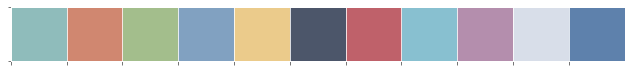

In [323]:
nord = [
    "#2e3440", 
    "#3b4252", 
    "#434c5e", 
    "#4c566a", 
    "#d8dee9", 
    "#e5e9f0", 
    "#eceff4", 
    "#8fbcbb", 
    "#88c0d0", 
    "#81a1c1", 
    "#5e81ac", 
    "#bf616a", 
    "#d08770",
    "#ebcb8b",
    "#a3be8c",
    "#b48ead",
]
polar_night = nord[:4]
snow_storm = nord[4:7]
frost = nord[7:11]
aurora = nord[11:]
nord_pal = [*aurora, *frost, polar_night[-1], snow_storm[0]]
idxs = [5, 1, 3, 7, 2, 9, 0, 6, 4, 10, 8]
nord_pal = sns.color_palette([nord_pal[i] for i in idxs])
sns.palplot(nord_pal)
sns.set_palette(nord_pal)

In [209]:
df = pd.read_csv("ROC_data.tsv", sep="\t")

In [210]:
df = df.query("nb_of_total_calls >= 100")

In [211]:
snippy_refs = ["NZ__010658", "NZ_CP016497", "NZ_CP013029", "NZ_CM001142", "NZ_AP014857", "NZ_AEJY01000392", "NC_017635"]
include = ["pandora", ]
include.extend([f"snippy_{x}.1" for x in snippy_refs])

df = df[df.tool.str.contains('|'.join(include))]

In [271]:
def naming_func(row):
    if "pandora" in row.tool:
        row.tool += f"_{row.coverage}"
    return row

In [273]:
df = df.apply(naming_func, axis=1)

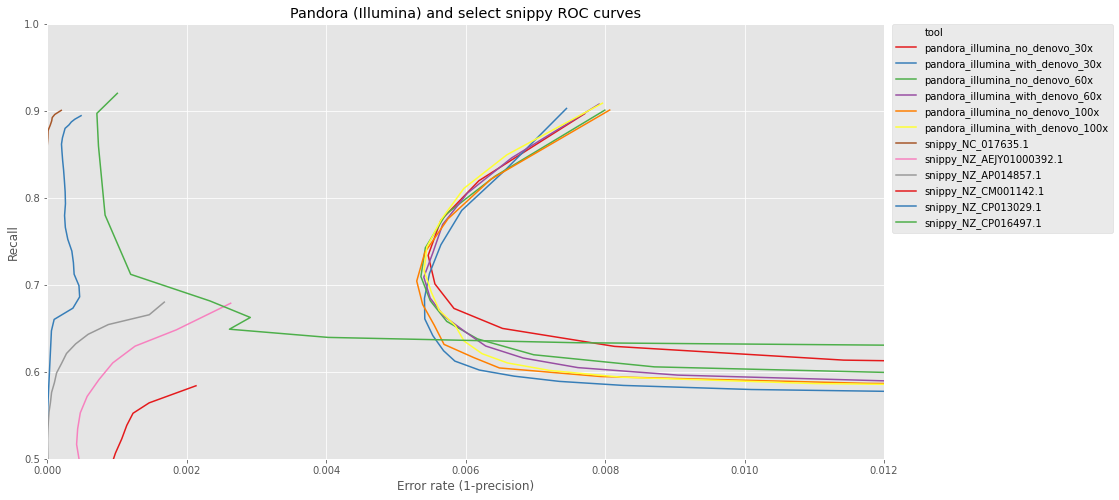

In [335]:
exclude = "nanopore"
data = df[~df.tool.str.contains(exclude)]
pal = sns.color_palette("Set1", n_colors=len(set(data.tool)))
fig, ax = plt.subplots(figsize=FIGSIZE)
# ax = sns.scatterplot(
#     data=df, 
#     x="error_rate", 
#     y="recall", 
#     hue="tool", 
#     ax=ax, s=70, 
#     alpha=0.5, 
#     edgecolor=nord[3],
# )
ax = sns.lineplot(
    data=data, 
    x="error_rate", 
    y="recall", 
    hue="tool", 
    ax=ax, 
    sort=False,
    palette=pal
)
_ = ax.set(
    xlabel="Error rate (1-precision)",
    ylabel="Recall",
    title="Pandora (Illumina) and select snippy ROC curves"
)
# Put the legend out of the figure
_ = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
_ = ax.set_xlim((0, 0.012))
_ = ax.set_ylim((0.5, 1))

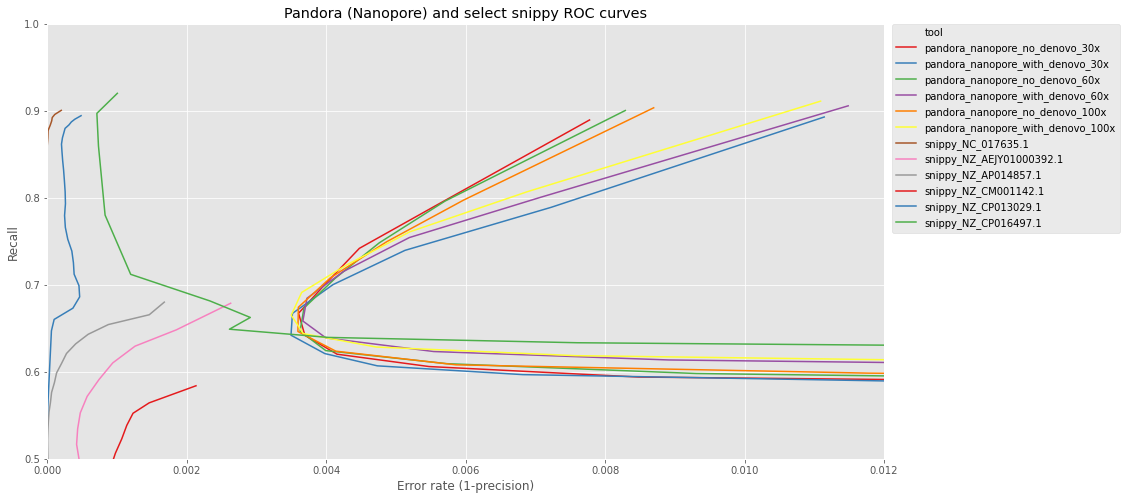

In [330]:
exclude = "illumina"
data = df[~df.tool.str.contains(exclude)]
pal = sns.color_palette("Set1", n_colors=len(set(data.tool)))
fig, ax = plt.subplots(figsize=FIGSIZE)
# ax = sns.scatterplot(
#     data=df, 
#     x="error_rate", 
#     y="recall", 
#     hue="tool", 
#     ax=ax, s=70, 
#     alpha=0.5, 
#     edgecolor=nord[3],
# )
ax = sns.lineplot(
    data=data, 
    x="error_rate", 
    y="recall", 
    hue="tool", 
    ax=ax, 
    sort=False,
    palette=pal
)
_ = ax.set(
    xlabel="Error rate (1-precision)",
    ylabel="Recall",
    title="Pandora (Nanopore) and select snippy ROC curves"
)
# Put the legend out of the figure
_ = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
_ = ax.set_xlim((0, 0.012))
_ = ax.set_ylim((0.5, 1))

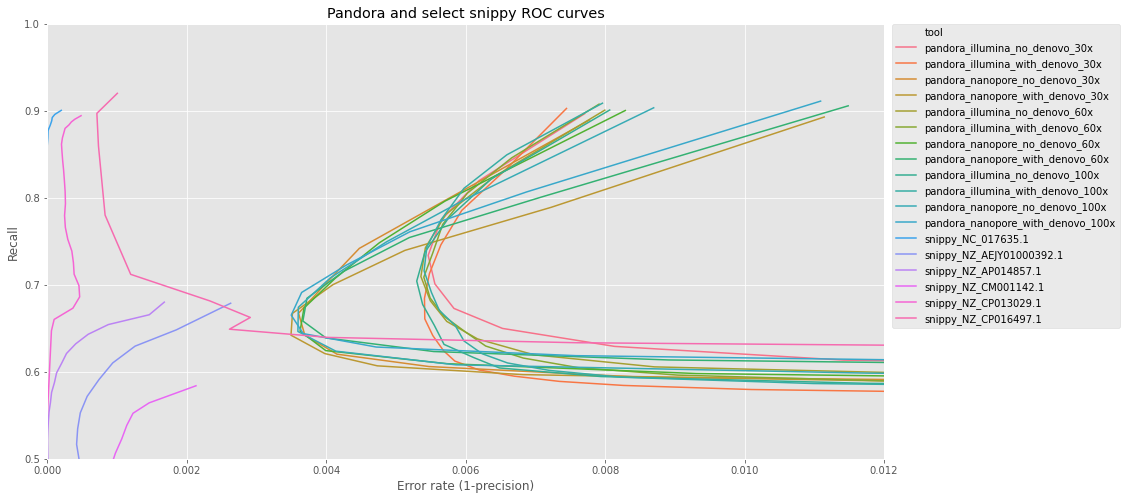

In [339]:
# exclude = "illumina"
# data = df[~df.tool.str.contains(exclude)]
# pal = sns.color_palette("Set1", n_colors=len(set(data.tool)))
fig, ax = plt.subplots(figsize=FIGSIZE)
# ax = sns.scatterplot(
#     data=df, 
#     x="error_rate", 
#     y="recall", 
#     hue="tool", 
#     ax=ax, s=70, 
#     alpha=0.5, 
#     edgecolor=nord[3],
# )
ax = sns.lineplot(
    data=df, 
    x="error_rate", 
    y="recall", 
    hue="tool", 
    ax=ax, 
    sort=False,
#     palette=pal
)
_ = ax.set(
    xlabel="Error rate (1-precision)",
    ylabel="Recall",
    title="Pandora and select snippy ROC curves"
)
# Put the legend out of the figure
_ = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
_ = ax.set_xlim((0, 0.012))
_ = ax.set_ylim((0.5, 1))

In [24]:
include = ["pandora", "snippy_NZ_CP016497.1"]
df[df.tool.str.contains('|'.join(include))]

,Unnamed: 0,tool,coverage,coverage_threshold,strand_bias_threshold,gaps_threshold,step_GT,error_rate,nb_of_correct_calls,nb_of_total_calls,recall,nb_of_truth_probes_found,nb_of_truth_probes_in_total
0,0,pandora_illumina_no_denovo,30x,0,0.0,1.0,0,0.007708,783960.598085,790050.0,0.896800,615551.0,686386.0
1,1,pandora_illumina_no_denovo,30x,0,0.0,1.0,1,0.006191,748186.389400,752847.0,0.819692,562625.0,686386.0
2,2,pandora_illumina_no_denovo,30x,0,0.0,1.0,2,0.005645,669896.701937,673700.0,0.774257,531439.0,686386.0
3,3,pandora_illumina_no_denovo,30x,0,0.0,1.0,3,0.005464,554298.896768,557344.0,0.733906,503743.0,686386.0
4,4,pandora_illumina_no_denovo,30x,0,0.0,1.0,4,0.005560,430498.858535,432906.0,0.701057,481196.0,686386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22312,22312,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,12,0.046030,464.583333,487.0,0.622438,427233.0,686386.0
22313,22313,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,13,0.073982,280.583333,303.0,0.619313,425088.0,686386.0
22314,22314,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,14,0.114371,173.583333,196.0,0.616312,423028.0,686386.0
22315,22315,snippy_NZ_CP016497.1,all,0,Not_App,Not_App,15,0.157475,114.583333,136.0,0.613292,420955.0,686386.0


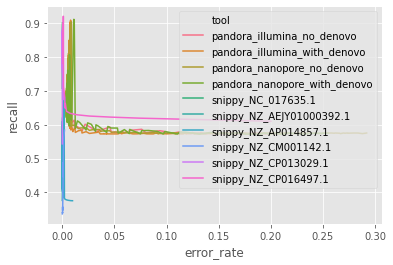

In [213]:
sns.lineplot(x="error_rate", y="recall", data=df, hue="tool")

In [172]:
df = pd.read_csv("ROC_data.tsv", sep="\t")

In [173]:
def naming_func(tool):
    if "snippy" in tool:
        return "snippy"
    elif "illumina" in tool:
        return "pandora_illumina"
    elif "nanopore" in tool:
        return "pandora_nanopore"
    else:
        raise ValueError(f"{tool} is not known")

In [174]:
df["tool"] = df.tool.apply(naming_func)

In [175]:
# snippy = df.query("tool == 'snippy'")
df = df.query("nb_of_total_calls >= 100 or error_rate <= 0.02")

In [176]:
bins = np.linspace(0, 0.02, 11)
df["binned_error_rate"] = pd.cut(x=df['error_rate'], bins=bins, include_lowest=True)

As snippy calls variants with respect to a single referece, to be able to compare pandora with it we need a way of "simulating" a population reference. To do this we selected 250 genomes from across the *E. coli* tree and called variants with snippy using each one.  
When calling variants both snippy and pandora also produce a genotype confidence which indicates how confident they are that the call is correct.  
A standard way of plotting this is recall on the y-axis and precision on the x-axis

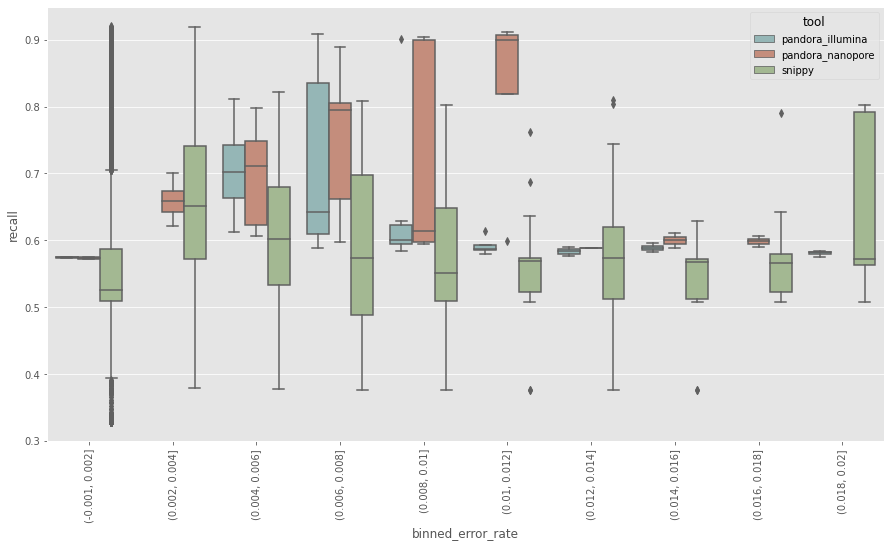

In [208]:
fig, ax = plt.subplots(figsize=FIGSIZE)
ax=sns.boxplot(x="binned_error_rate", y="recall", data=df, hue="tool", palette=nord_pal)
# ax=sns.swarmplot(x="binned_error_rate", y="recall", data=df.query("tool!='snippy'"), hue="tool")
_ = plt.xticks(rotation=90)
# _ = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# ax.set_xlim((pd.Interval(0, 0.00584, closed="right"), pd.Interval(0.0642, 0.0701, closed='right')))

In [95]:
snippy.error_rate.max()

0.2600160256410257

In [121]:
ax.xaxis

TypeError: 'XAxis' object is not iterable

In [125]:
set(df["binned_error_rate"])

{Interval(0.0, 0.00584, closed='right'),
 Interval(0.00584, 0.0117, closed='right'),
 Interval(0.0117, 0.0175, closed='right'),
 Interval(0.0175, 0.0234, closed='right'),
 Interval(0.0234, 0.0292, closed='right'),
 Interval(0.0292, 0.035, closed='right'),
 Interval(0.035, 0.0409, closed='right'),
 Interval(0.0409, 0.0467, closed='right'),
 Interval(0.0467, 0.0525, closed='right'),
 Interval(0.0525, 0.0584, closed='right'),
 Interval(0.0584, 0.0642, closed='right'),
 Interval(0.0642, 0.0701, closed='right'),
 Interval(0.0701, 0.0759, closed='right'),
 Interval(0.0759, 0.0817, closed='right'),
 Interval(0.0817, 0.0876, closed='right'),
 Interval(0.0876, 0.0934, closed='right'),
 Interval(0.0934, 0.0992, closed='right'),
 Interval(0.0992, 0.105, closed='right'),
 Interval(0.105, 0.111, closed='right'),
 Interval(0.111, 0.117, closed='right'),
 Interval(0.117, 0.123, closed='right'),
 Interval(0.123, 0.128, closed='right'),
 Interval(0.128, 0.134, closed='right'),
 Interval(0.134, 0.14, cl